In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("E:\Conda projects/data/Dirk.csv")

import sys
sys.path.append(r"E:\Conda projects")
from src.utils import validate_dataset

validate_dataset(df, "Dirk per game stats")

In [14]:
import sqlite3

# Create database
conn = sqlite3.connect("E:\Conda projects/data/Dirk_stats.db")

# Save dataframe to SQL
df.to_sql("dirk_stats", conn, if_exists="replace", index=False)

print("Database created.")

Database created.


In [ ]:
pd.read_sql("SELECT COUNT(*) FROM dirk_stats", conn)

query = """
SELECT Season, PTS, FG, FGA, "3P", "3PA"
FROM dirk_stats
ORDER BY PTS DESC
LIMIT 5;
"""

pd.read_sql(query, conn)

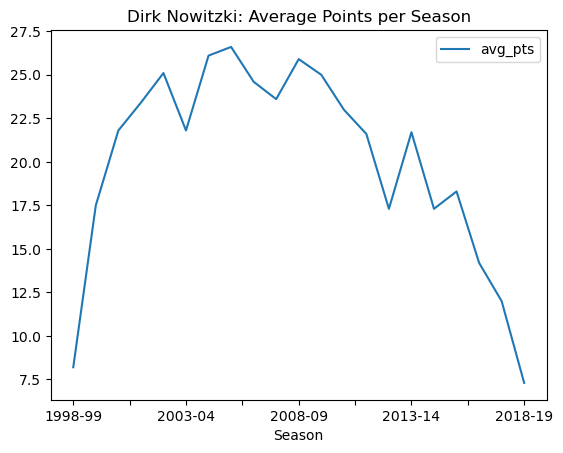

In [16]:
query = """
SELECT Season, AVG(PTS) AS avg_pts
FROM dirk_stats
GROUP BY Season
ORDER BY Season;
"""

season_pts = pd.read_sql(query, conn)

season_pts.plot(
    x="Season",
    y="avg_pts",
    title="Dirk Nowitzki: Average Points per Season"
)

plt.show()
conn.close()